In [1]:
import qubit_spec_def as rod3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
 info = {
    
        "data_dictionary": "quantify-data/",
    
        "qrm_ip": "192.168.0.4",
    
        "qcm_ip": "192.168.0.3",
        
        "waveform_qrm":{
            "amplitude": 0.5,
            "IF_frequency": 20e6,  
            "waveform_length": 500,   # nanoseconds
            "offset_i": -0,  
            "offset_q": -0,
        },
    
        "RohdeSchwar_LO_qrm": {
            "ip": 'TCPIP0::192.168.0.11::inst0::INSTR',
            "power": 15,
           # "frequency":7.82216e9,
            "frequency":7.7822e9,
            "label": "qrm_LO"
        },
    
        "RohdeSchwar_LO_qcm":{
                "ip": 'TCPIP0::192.168.0.7::inst0::INSTR',
                "power": 12,
                "frequency": 8.846e9+100e6,
                "frequency_start": 8.82e9, #8.83e9+100e6,
                "frequency_stop": 8.89e9,   #8.875e9+100e6,
                "frequency_step": 1e6,
                "label": "qcm_LO"
        },
    
        #Waveforms for channle 1 & 2 of QCM
        "waveform_qcm_1":{
            "waveform_type": "Block",    #"Gaussian" or "Block"
            
            "amplitude": 0.5,
            #"amplitude_start": 0,
            #"amplitude_stop": 0.7,
            #"amplitude_step": 0.002,
            
            "IF_frequency": 100e6, # it means the RF tone will be generated below
            
            "waveform_length": 200,   # nanoseconds
            "waveform_length_start": 50,  # nanoseconds
            "waveform_length_stop": 1000,  # nanoseconds
            "waveform_length_step": 50,   # nanoseconds
            
            "offset_i": -0,
            "offset_q": -0,
            "gain": 1.,
            "standard_deviation": 50,   # For Gaussian waveform
        },
    
        #"trigger":{
        #    "num_1": "qcm_1",    # "qcm_1" OR "qrm"
        #    "num_2": "qrm",    # "qcm_1" OR "qrm"
        #    "trig_interval": 20    # The time interval from previous waveform.
            
        #},
    
        "integral_info":{
            "start_sample": 130,
            'hardware_avg': 1024,
            "integration_length": 600,
            "sampling_rate": 1e9,
            "mode": "ssb"
        },
    
        "number_of_average": 2048,
        "software_averages": 5,
}

In [3]:
ro = rod3.qubit_spec(info)
ro.instantiate_instruments()

Data will be saved in:
quantify-data/
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113050, firmware:4.2.76.0-4.30.046.295) in 0.12s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/113049, firmware:4.2.76.0-4.30.046.295) in 0.02s


# 1. Resonator Spectroscopy

In [11]:
ro.plotmon.tuids_max_num(2)
ro.info['software_averages'] = 3
ro.info['number_of_average'] = 1024
ro.info['integral_info']['hardware_avg'] = ro.info['number_of_average']

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 12,
                "frequency_start": 8.82e9+200e6,
                "frequency_stop": 8.88e9+200e6,
                "frequency_step": .5e6,
                "frequency": 8.846e9+200e6,
        })
ro.info['waveform_qcm_1']['gain'] = .2
ro.info['waveform_qcm_1']['amplitude'] = 0.
ro.info['waveform_qcm_1']['waveform_length'] = 4000


ro.info['waveform_qrm']['amplitude'] = 0.2      # RO amp
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.80185e9-ro.info['waveform_qrm']['IF_frequency']
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power

ro.qrm.pulsar_qrm.sequencer0_gain_awg_path0(1.)
ro.qrm.pulsar_qrm.sequencer0_gain_awg_path1(1.)
#ro.run_qubit_freq_spec()

ro.run_resonator_scan(np.arange(-2.5e6,2.5e6,.05e6)+7.80185e9-ro.info['waveform_qrm']['IF_frequency'])

parsed amp = 0.0 V
0.19998779892921448
0.19998779892921448
 100% completed 	elapsed time: 85.3s 	time left: 0.0s


# 2. Qubit spectroscopy

In [22]:
ro.plotmon.tuids_max_num(3)
ro.info['software_averages'] = 5
ro.info['number_of_average'] = 1024*4

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency_start": 8.95e9-30e6,
                "frequency_stop": 8.95e9+30e6,
                "frequency_step": .5e6,
        })

ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
ro.info['waveform_qcm_1']['gain'] = .5
ro.info['waveform_qcm_1']['amplitude'] = 0.3
ro.info['waveform_qcm_1']['waveform_length'] = 1500

ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.1
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']
ro.run_qubit_freq_spec()

parsed amp = 0.3 V
0.4999847412109375
0.4999847412109375
[0.00153386 0.00671575] 0.019511195358342982 0.024823293363679243
 0% completed 	elapsed time: 0.9s 	time left: 567.2s[0.00170594 0.00692537] 0.019093721332129665 0.026823044147568455
 0% completed 	elapsed time: 1.9s 	time left: 571.7s[0.00147182 0.0064002 ] 0.02239758567689183 0.028165343027185444
 0% completed 	elapsed time: 2.9s 	time left: 575.2s[0.00178854 0.00685721] 0.02193537519644568 0.029283963537873412
 0% completed 	elapsed time: 3.9s 	time left: 575.5s[0.00139215 0.00667227] 0.020484824806890234 0.026388975507567487
 0% completed 	elapsed time: 4.8s 	time left: 575.0s[0.00151053 0.00689431] 0.021023173569805417 0.027834988558605698
 1% completed 	elapsed time: 5.8s 	time left: 578.7s[0.00176941 0.00661551] 0.019648698017669414 0.028511732979180675
 1% completed 	elapsed time: 6.8s 	time left: 579.8s[0.00165127 0.00686846] 0.021764832078088395 0.02823312316340592
 1% completed 	elapsed time: 7.8s 	time left: 578.1s[0

# 3. Rabi

In [6]:
ro.plotmon.tuids_max_num(3)
ro.info['software_averages'] = 4
ro.info['number_of_average'] = 1024*20

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency": 8.9515e9,
        })

ro.info['waveform_qcm_1']['gain'] = .5
ro.info['waveform_qcm_1']['amplitude'] = .4
ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'






ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.1
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.run_rabi_length(np.arange(50,4000,50))

0.4999847412109375
0.4999847412109375
 3% completed 	elapsed time: 47.2s 	time left: 1309.8s
Interrupt signaled, exiting gracefully...


# Final datataking

In [37]:
ro.plotmon.tuids_max_num(1)
for g in [0.25,0.5,1]:
    ro.plotmon.tuids_max_num(3)
    ro.info['software_averages'] = 8
    ro.info['number_of_average'] = 1024*4

    ro.info['RohdeSchwar_LO_qcm'].update({
                    "power": 13,
                    "frequency": 8.9515e9,
            })

    ro.info['waveform_qcm_1']['gain'] = g
    ro.info['waveform_qcm_1']['amplitude'] = .4
    ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'



    ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
    ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
    ro.info['waveform_qrm']['amplitude'] = 0.10
    ro.info['waveform_qrm']['waveform_length'] = 1500
    ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

    ro.run_rabi_length(np.arange(4,201,4))

0.24997711181640625
0.24997711181640625
[0.00131103 0.00339355] 0.020454389951073598 0.021762816955086008
 0% completed 	elapsed time: 1.0s 	time left: 388.2s[0.00137166 0.00339651] 0.01862720093708728 0.021490525566805495
 0% completed 	elapsed time: 2.0s 	time left: 390.7s[0.0012467  0.00326283] 0.01940575255052482 0.022471286679178644
 0% completed 	elapsed time: 3.0s 	time left: 394.6s[0.00110475 0.00331026] 0.022039780562183076 0.021611302500493167
 1% completed 	elapsed time: 4.0s 	time left: 394.6s[0.00130179 0.0033377 ] 0.020916961446496372 0.023725769265766215
 1% completed 	elapsed time: 5.0s 	time left: 393.6s[0.00095552 0.00331721] 0.01990723377110514 0.02367701596164038
 1% completed 	elapsed time: 6.0s 	time left: 394.6s[0.00128818 0.00315568] 0.024147865524140645 0.022071611506765204
 1% completed 	elapsed time: 7.0s 	time left: 393.3s[0.00090329 0.0030147 ] 0.017910277187974312 0.02083691365629297
 2% completed 	elapsed time: 8.0s 	time left: 392.1s[0.00097533 0.0027165

In [7]:
ro.plotmon.tuids_max_num(3)
ro.info['software_averages'] = 4
ro.info['number_of_average'] = 1024*4

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency": 8.9515e9,
        })

ro.info['waveform_qcm_1']['gain'] = 1.
ro.info['waveform_qcm_1']['amplitude'] = .8
ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
ro.info['waveform_qcm_1']['waveform_length'] = 40





ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.10
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.run_rabi_gain(np.arange(0.16,0.24,0.005))

parsed amp = 0.8 V
0.20197150111198425
1.0
 100% completed 	elapsed time: 62.3s 	time left: 0.0s


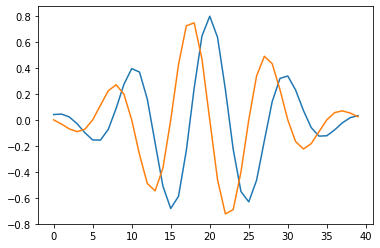

In [14]:
plt.plot(ro.qcm.pulsar_qcm.get_waveforms(0)['modI_qcm_1']['data'])
plt.plot(ro.qcm.pulsar_qcm.get_waveforms(0)['modQ_qcm_1']['data'])

In [7]:
ro.plotmon.tuids_max_num(2)
ro.info['software_averages'] = 16
ro.info['number_of_average'] = 1024*4

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency": 8.9515e9,
        })

ro.info['waveform_qcm_1']['gain'] = .18
ro.info['waveform_qcm_1']['amplitude'] = .8
ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
ro.info['waveform_qcm_1']['standard_deviation'] = 10


ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.10
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.run_rabi_length_gain(np.arange(4,201,4),
                        np.arange(0,1.01,0.02))

0.0
0.17999817430973053
 42% completed 	elapsed time: 17578.2s 	time left: 23512.1s
Interrupt signaled, exiting gracefully...


# T1 measurement

In [ ]:
for i in range(10000):
    ro.plotmon.tuids_max_num(2)
    ro.info['software_averages'] = 4
    ro.info['number_of_average'] = 1024*4

    ro.info['RohdeSchwar_LO_qcm'].update({
                    "power": 13,
                    "frequency": 8.9515e9,
            })

    ro.info['waveform_qcm_1']['gain'] = .18
    ro.info['waveform_qcm_1']['amplitude'] = .8
    ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
    ro.info['waveform_qcm_1']['standard_deviation'] = 10


    ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
    ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
    ro.info['waveform_qrm']['amplitude'] = 0.10
    ro.info['waveform_qrm']['waveform_length'] = 1500
    ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

    ro.run_t1(np.arange(20,1000*4,40*2))

# Ramsey

In [12]:
ro.plotmon.tuids_max_num(3)
ro.info['software_averages'] = 20
ro.info['number_of_average'] = 1024*10

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency": 8.9515e9+3.77e6,
        })

ro.info['waveform_qcm_1']['gain'] = .214/2
ro.info['waveform_qcm_1']['amplitude'] = .8
ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
ro.info['waveform_qcm_1']['waveform_length'] = 40
ro.info['waveform_qcm_1']['standard_deviation'] = ro.info['waveform_qcm_1']['waveform_length']/5


ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.10
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.run_ramsey(np.arange(1,1000*2,10))

parsed amp = 0.8 V
0.10699789226055145
0.10699789226055145
 9% completed 	elapsed time: 819.6s 	time left: 7993.4s
Interrupt signaled, exiting gracefully...


# Echo 

In [4]:
ro.plotmon.tuids_max_num(2)
ro.info['software_averages'] = 20
ro.info['number_of_average'] = 1024*10

ro.info['RohdeSchwar_LO_qcm'].update({
                "power": 13,
                "frequency": 8.9515e9,
        })

ro.info['waveform_qcm_1']['gain'] = .18
ro.info['waveform_qcm_1']['amplitude'] = .8
ro.info['waveform_qcm_1']['waveform_type'] = 'Gaussian'   #'Gaussian' or 'Block'
ro.info['waveform_qcm_1']['waveform_length'] = 39



ro.info['RohdeSchwar_LO_qrm']['frequency'] = 7.7822e9
ro.info['RohdeSchwar_LO_qrm']['power'] = 15     # RO LO power
ro.info['waveform_qrm']['amplitude'] = 0.10
ro.info['waveform_qrm']['waveform_length'] = 1500
ro.info['integral_info']['integration_length'] = ro.info['waveform_qrm']['waveform_length']

ro.run_echo(np.arange(2,1000*4,40*2))  # The numbers must be odd!!!!

parsed amp = 0.8 V
1.0
0.17999817430973053


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa6 in position 155: invalid start byte

In [10]:
1/265


0.0037735849056603774